### Fitting the distribution

- Predictive power
- Inventory management
- Capacity management
- Understand how demand behaves

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# shape, scale = 110, 4  # mean=4, std=2*sqrt(2)
# s = np.random.erlang(shape, scale, 1000)

# Generate Gumbel c data with numpy
data = np.random.gumbel(100, 15, size=100)

df = pd.DataFrame(data, columns=["Demand"])

df

,Demand
0,117.748961
1,108.142973
2,111.265213
3,110.217163
4,108.530763
...,...
95,124.888303
96,160.043388
97,100.760458
98,94.041732


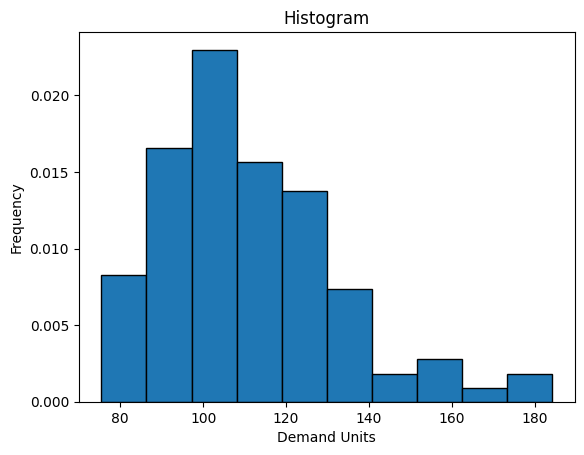

In [14]:
plt.hist(df['Demand'], histtype="bar", edgecolor="Black", density=True)

# add labels and title
plt.xlabel('Demand Units')
plt.ylabel('Frequency')
plt.title('Histogram')

# show the plot
plt.show()

['_fit', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss'

Fitting 110 distributions:  25%|█████████████▋                                        | 28/110 [00:13<01:21,  1.01it/s]C:\Users\jacqu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\jacqu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  62%|█████████████████████████████████▍                    | 68/110 [00:50<01:29,  2.13s/it]SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,0.011005,1065.931515,-897.638289,inf,0.048852,0.961390
dgamma,0.011050,1118.326249,-897.238117,inf,0.069093,0.699907
exponnorm,0.011146,1061.345719,-896.371996,inf,0.053000,0.927266
burr,0.011150,1064.668326,-891.724731,inf,0.052068,0.936033
mielke,0.011150,1065.977849,-891.723867,inf,0.052196,0.934863


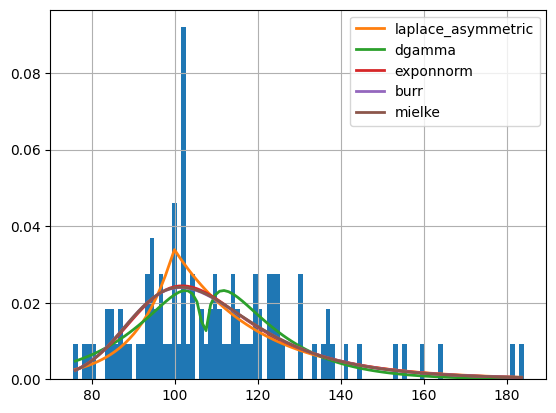

In [15]:
from fitter import Fitter

f = Fitter(df['Demand'])
print(f.distributions)


f.fit()
f.summary()

In [16]:
ranking = pd.DataFrame(f.df_errors['sumsquare_error'].sort_values())
ranking

,sumsquare_error
laplace_asymmetric,0.011005
dgamma,0.011050
exponnorm,0.011146
burr,0.011150
mielke,0.011150
...,...
vonmises,inf
kstwo,inf
recipinvgauss,inf
vonmises_line,inf


In [17]:
ranking.head(25)

,sumsquare_error
laplace_asymmetric,0.011005
dgamma,0.011050
exponnorm,0.011146
burr,0.011150
mielke,0.011150
burr12,0.011155
fisk,0.011157
alpha,0.011174
genlogistic,0.011178
gumbel_r,0.011179


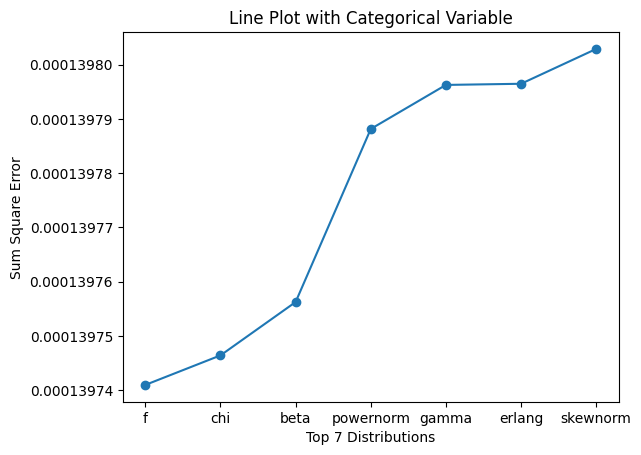

In [7]:
plt.plot(ranking.index[:7], ranking.iloc[:7, 0], '-o')

best_dist = ranking.index[0]

# add labels and title
plt.xlabel('Top 7 Distributions')
plt.ylabel('Sum Square Error')
plt.title('Line Plot with Categorical Variable')

# show the plot
plt.show()

In [10]:
from scipy.stats import gamma, burr12, beta
# Scipy uses standardized params for dists.

params = f.get_best()[best_dist]

# stuff = gamma.stats(a=params['a'], loc=params['loc'], scale=params['scale'], moments='mv')


{'a': 97.87761073231746, 'b': 161981726.28851742, 'loc': 9.145311137280537, 'scale': 714239449.6002064}


316.40037548747017


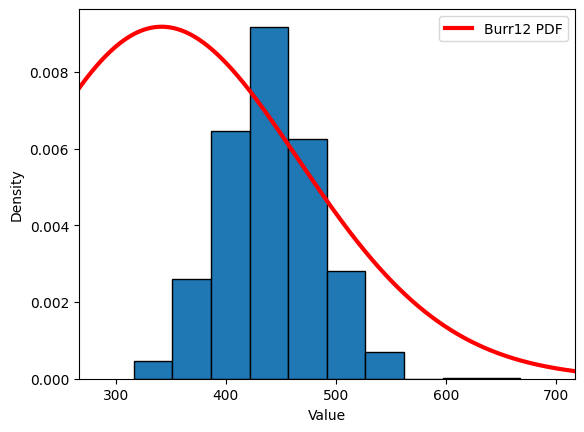

In [11]:
bin_edges = plt.hist(df['Demand'], histtype="bar", edgecolor="Black", density=True)
print(bin_edges[1][0])

x = np.linspace(bin_edges[1][0], bin_edges[1][10], 1000)

pdf = beta.pdf(x, a=params['a'], b=params['b'], loc=params['loc'], scale=params['scale'])
plt.plot(pdf, 'r-', lw=3, label='Burr12 PDF', )

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.xlim(bin_edges[1][0]-50, bin_edges[1][10]+50)
plt.show()